# **Funnel Data Analysis Project**

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")

### **Corporate Styling**

In [2]:
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')
print('Everything is Fine')

Everything is Fine


### **Load Dataset**

In [3]:
df = pd.read_csv('funnel_analysis_data.csv')

In [4]:
df.head()

,User_ID,Session_ID,Event,Timestamp,Device,Region,Channel,Product_Category,Revenue,Bounce_Flag
0,USR00001,SES00001,Browse,2025-10-28 07:33:50,Desktop,West,Organic,Home,0.0,Yes
1,USR00001,SES00001,Add to Cart,2025-10-28 07:36:50,Tablet,East,Social Media,Beauty,0.0,Yes
2,USR00001,SES00001,Checkout,2025-10-28 07:40:50,Mobile,West,Email,Beauty,0.0,Yes
3,USR00002,SES00002,Browse,2025-10-19 09:15:10,Desktop,East,Email,Electronics,0.0,No
4,USR00002,SES00002,Add to Cart,2025-10-19 09:18:10,Mobile,West,Social Media,Fashion,0.0,No


## **Exploring Data**

In [5]:
# Total Columns and Number of Columns
print(df.columns)

print(f'\nTotal Number of Columns: {df.columns.nunique()}')

Index(['User_ID', 'Session_ID', 'Event', 'Timestamp', 'Device', 'Region',
       'Channel', 'Product_Category', 'Revenue', 'Bounce_Flag'],
      dtype='object')

Total Number of Columns: 10


In [6]:
# data types of all columns
df.dtypes

User_ID              object
Session_ID           object
Event                object
Timestamp            object
Device               object
Region               object
Channel              object
Product_Category     object
Revenue             float64
Bounce_Flag          object
dtype: object

In [7]:
# Timestamp column must be in datetime type
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
print(df.dtypes)

User_ID                     object
Session_ID                  object
Event                       object
Timestamp           datetime64[ns]
Device                      object
Region                      object
Channel                     object
Product_Category            object
Revenue                    float64
Bounce_Flag                 object
dtype: object


In [8]:
# info about all columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21663 entries, 0 to 21662
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   User_ID           21663 non-null  object        
 1   Session_ID        21663 non-null  object        
 2   Event             21663 non-null  object        
 3   Timestamp         21663 non-null  datetime64[ns]
 4   Device            21663 non-null  object        
 5   Region            21663 non-null  object        
 6   Channel           21663 non-null  object        
 7   Product_Category  21663 non-null  object        
 8   Revenue           21663 non-null  float64       
 9   Bounce_Flag       21663 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 1.7+ MB


In [9]:
# imp info about numeric data 
df.describe()

,Timestamp,Revenue
count,21663,21663.000000
mean,2025-10-16 19:56:22.920740608,54.304841
min,2025-10-01 19:30:17,0.000000
25%,2025-10-09 08:31:38,0.000000
50%,2025-10-16 19:47:21,0.000000
75%,2025-10-24 08:13:17,0.000000
max,2025-10-31 19:25:15,1998.510000
std,NaN,262.692471


In [10]:
df.describe(include = object)

,User_ID,Session_ID,Event,Device,Region,Channel,Product_Category,Bounce_Flag
count,21663,21663,21663,21663,21663,21663,21663,21663
unique,10000,10000,4,3,4,4,5,2
top,USR09979,SES09979,Browse,Tablet,West,Google Ads,Electronics,Yes
freq,4,4,10000,7237,5462,5435,4405,17343


In [11]:
df.head()

,User_ID,Session_ID,Event,Timestamp,Device,Region,Channel,Product_Category,Revenue,Bounce_Flag
0,USR00001,SES00001,Browse,2025-10-28 07:33:50,Desktop,West,Organic,Home,0.0,Yes
1,USR00001,SES00001,Add to Cart,2025-10-28 07:36:50,Tablet,East,Social Media,Beauty,0.0,Yes
2,USR00001,SES00001,Checkout,2025-10-28 07:40:50,Mobile,West,Email,Beauty,0.0,Yes
3,USR00002,SES00002,Browse,2025-10-19 09:15:10,Desktop,East,Email,Electronics,0.0,No
4,USR00002,SES00002,Add to Cart,2025-10-19 09:18:10,Mobile,West,Social Media,Fashion,0.0,No


## Pre-Processing and Data Cleaning

In [12]:
# Cheak for Null and Duplicate Values

print('\n-----Finding null values-----\n')
null_values = df.isnull().sum()
print(null_values)

print('\n-----Finding duplicate values-----\n')
duplicate_values = df.duplicated().sum()
print(f'Total number of duplicate values in this dataset is {duplicate_values}')

print('\n-----Total Unique Data-----\n')
unique_data = df.nunique()
print(unique_data)


-----Finding null values-----

User_ID             0
Session_ID          0
Event               0
Timestamp           0
Device              0
Region              0
Channel             0
Product_Category    0
Revenue             0
Bounce_Flag         0
dtype: int64

-----Finding duplicate values-----

Total number of duplicate values in this dataset is 0

-----Total Unique Data-----

User_ID             10000
Session_ID          10000
Event                   4
Timestamp           21564
Device                  3
Region                  4
Channel                 4
Product_Category        5
Revenue              1078
Bounce_Flag             2
dtype: int64


In [13]:
# Extract date and time-based features from Timestamp for analysis
df['Date'] = df['Timestamp'].dt.date
df['DayOfWeek'] =  df['Timestamp'].dt.day_name()
df['Hour'] = df['Timestamp'].dt.hour
df['WeekNumber'] = df['Timestamp'].dt.isocalendar().week

In [14]:
# Create a new column and assign a sequential number within each session
df['Event_sequence'] = df.groupby('Session_ID').cumcount() + 1

In [15]:
# Date range
print(f'Date Range - {df['Date'].min()} to {df['Date'].max()}')

Date Range - 2025-10-01 to 2025-10-31


In [16]:
df.head()

,User_ID,Session_ID,Event,Timestamp,Device,Region,Channel,Product_Category,Revenue,Bounce_Flag,Date,DayOfWeek,Hour,WeekNumber,Event_sequence
0,USR00001,SES00001,Browse,2025-10-28 07:33:50,Desktop,West,Organic,Home,0.0,Yes,2025-10-28,Tuesday,7,44,1
1,USR00001,SES00001,Add to Cart,2025-10-28 07:36:50,Tablet,East,Social Media,Beauty,0.0,Yes,2025-10-28,Tuesday,7,44,2
2,USR00001,SES00001,Checkout,2025-10-28 07:40:50,Mobile,West,Email,Beauty,0.0,Yes,2025-10-28,Tuesday,7,44,3
3,USR00002,SES00002,Browse,2025-10-19 09:15:10,Desktop,East,Email,Electronics,0.0,No,2025-10-19,Sunday,9,42,1
4,USR00002,SES00002,Add to Cart,2025-10-19 09:18:10,Mobile,West,Social Media,Fashion,0.0,No,2025-10-19,Sunday,9,42,2


## Funnel Stage Definition and Session Level Aggregation

In [17]:
funnel_stages = ['Browse', 'Add to Cart', 'Checkout', 'Purchase']

# Create session-level summary
session_summary = df.groupby('Session_ID').agg({
    'User_ID': 'first',
    'Timestamp': ['min', 'max'],
    'Event': lambda x: list(x),
    'Device': 'first',
    'Region': 'first',
    'Channel': 'first',
    'Product_Category': 'first',
    'Revenue': 'max',
    'Bounce_Flag': 'first'
}).reset_index()

# Flatten column names
session_summary.columns = [
    'Session_ID', 'User_ID', 'Session_Start', 'Session_End',
    'Event_Sequence', 'Device', 'Region', 'Channel',
    'Product_Category', 'Revenue', 'Bounce_Flag'
]

# Calculate session duration in minutes
session_summary['Session_Duration_Min'] = (
    session_summary['Session_End'] - session_summary['Session_Start']
).dt.total_seconds() / 60


# Identify maximum funnel stage reached for each session
def get_max_funnel_stage(events):
    # Map each funnel stage to its order index
    stage_values = {stage: i for i, stage in enumerate(funnel_stages)}
    
    # Initialize with no stage found
    max_stage_index = -1

    # Iterate through all events in the session
    for event in events:
        if event in stage_values and stage_values[event] > max_stage_index:
            max_stage_index = stage_values[event]

    # Return the deepest funnel stage reached
    if max_stage_index != -1:
        return funnel_stages[max_stage_index]
    else:
        return 'Browse'


# Apply the function to each session's event sequence
session_summary['Max_Funnel_Stage'] = (
    session_summary['Event_Sequence']
    .apply(get_max_funnel_stage)
)

print("📊 Session Summary Created:")
display(session_summary.head())


📊 Session Summary Created:


,Session_ID,User_ID,Session_Start,Session_End,Event_Sequence,Device,Region,Channel,Product_Category,Revenue,Bounce_Flag,Session_Duration_Min,Max_Funnel_Stage
0,SES00001,USR00001,2025-10-28 07:33:50,2025-10-28 07:40:50,"[Browse, Add to Cart, Checkout]",Desktop,West,Organic,Home,0.00,Yes,7.0,Checkout
1,SES00002,USR00002,2025-10-19 09:15:10,2025-10-19 09:27:10,"[Browse, Add to Cart, Checkout, Purchase]",Desktop,East,Email,Electronics,448.18,No,12.0,Purchase
2,SES00003,USR00003,2025-10-12 02:19:00,2025-10-12 02:29:00,"[Browse, Add to Cart, Checkout, Purchase]",Desktop,East,Google Ads,Beauty,1437.19,No,10.0,Purchase
3,SES00004,USR00004,2025-10-05 17:55:48,2025-10-05 17:55:48,[Browse],Tablet,West,Social Media,Home,0.00,Yes,0.0,Browse
4,SES00005,USR00005,2025-10-19 12:35:49,2025-10-19 12:37:49,"[Browse, Add to Cart]",Tablet,West,Google Ads,Electronics,0.00,Yes,2.0,Add to Cart


In [18]:
from IPython.display import display

# Calculate overall funnel metrics
funnel_metrics = []

for i, stage in enumerate(funnel_stages):
    if i == 0:
        count = len(session_summary)
    else:
        count = len(
            session_summary[
                session_summary['Max_Funnel_Stage'].isin(funnel_stages[i:])
            ]
        )

    funnel_metrics.append({'Stage': stage, 'Sessions': count, 'Stage_Order': i})

funnel_df = pd.DataFrame(funnel_metrics)

funnel_df['Conversion_Rate'] = (
    funnel_df['Sessions'] / funnel_df['Sessions'].iloc[0] * 100).round(2)

funnel_df['Drop_Off_Rate'] = (
    (1 - funnel_df['Sessions'] / funnel_df['Sessions'].shift(1)) * 100)

funnel_df.loc[0, 'Drop_Off_Rate'] = 0
funnel_df['Drop_Off_Rate'] = funnel_df['Drop_Off_Rate'].round(2)

print("🎯 Overall Funnel Analysis:")
display(funnel_df)

# Revenue analysis
revenue_stats = session_summary[session_summary['Max_Funnel_Stage'] == 'Purchase'].agg({
    'Revenue': ['sum', 'mean', 'count']}).round(2)

print("\n💰 Revenue Analysis:")
print(f"Total Revenue: ${revenue_stats.iloc[0, 0]:,.2f}")
print(f"Average Order Value: ${revenue_stats.iloc[1, 0]:,.2f}")
print(f"Total Orders: {revenue_stats.iloc[2, 0]:,}")

🎯 Overall Funnel Analysis:


,Stage,Sessions,Stage_Order,Conversion_Rate,Drop_Off_Rate
0,Browse,10000,0,100.00,0.00
1,Add to Cart,7059,1,70.59,29.41
2,Checkout,3524,2,35.24,50.08
3,Purchase,1080,3,10.80,69.35



💰 Revenue Analysis:
Total Revenue: $1,176,405.78
Average Order Value: $1,089.26
Total Orders: 1,080.0


# **Visualization - Overall Funnel**

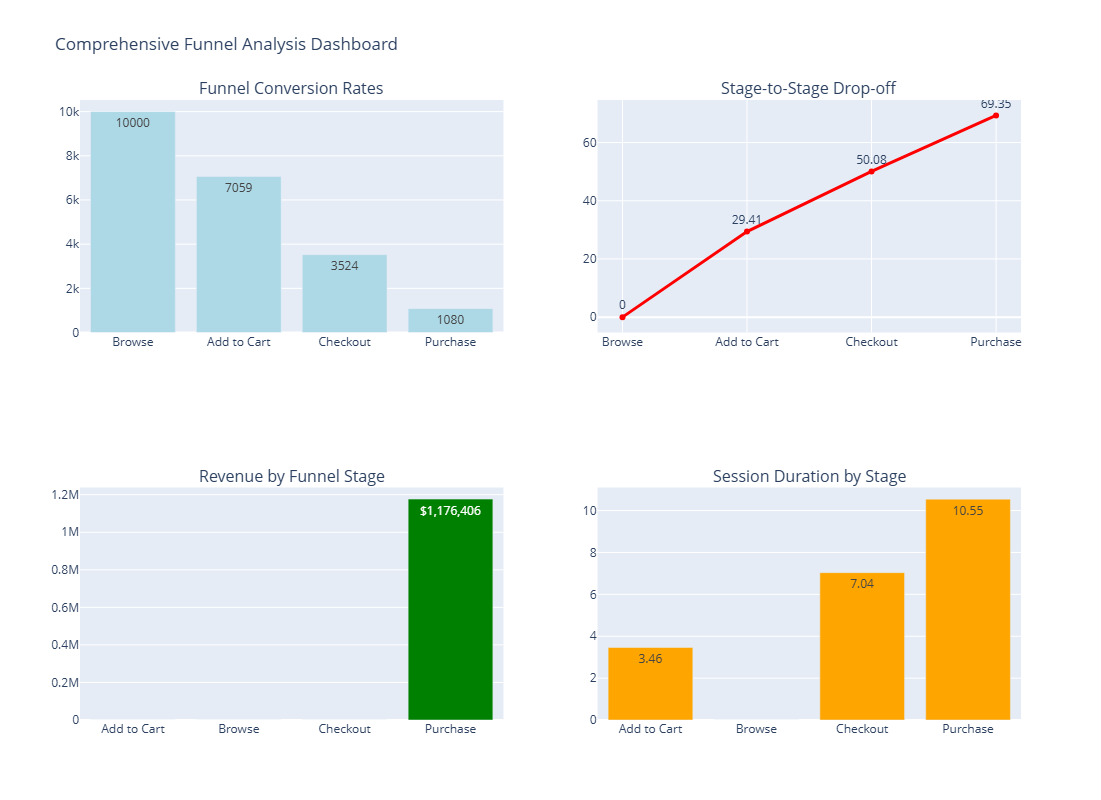

In [25]:
# Create comprehensive funnel visualization
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Funnel Conversion Rates", "Stage-to-Stage Drop-off", "Revenue by Funnel Stage", "Session Duration by Stage"),
    specs=[[{"secondary_y": False}, {"secondary_y": False}],
            [{"secondary_y": False}, {"secondary_y": False}]]
)

# Funnel conversion rates

fig.add_trace(
    go.Bar(x=funnel_df["Stage"], y=funnel_df["Sessions"], text=funnel_df["Sessions"], textposition="auto", name="Sessions",
        marker_color="lightblue"), row=1, col=1)

# Drop-off rates

fig.add_trace(
    go.Scatter(x=funnel_df["Stage"], y=funnel_df["Drop_Off_Rate"], mode="lines+markers+text", text=funnel_df["Drop_Off_Rate"],
        textposition="top center", name="Drop-off Rate (%)", line=dict(color="red", width=3)), row=1, col=2,secondary_y=False
)

# Revenue by stage

revenue_by_stage = (session_summary.groupby("Max_Funnel_Stage")["Revenue"].sum().reset_index())

fig.add_trace(
    go.Bar(x=revenue_by_stage["Max_Funnel_Stage"], y=revenue_by_stage["Revenue"], 
           text=[f"${x:,.0f}" for x in revenue_by_stage["Revenue"]], textposition="auto",
            name="Revenue", marker_color="green"), row=2, col=1
)

# Session duration by stage

duration_by_stage = (session_summary.groupby("Max_Funnel_Stage")["Session_Duration_Min"].mean()
                     .reset_index())

fig.add_trace(
    go.Bar(x=duration_by_stage["Max_Funnel_Stage"], y=duration_by_stage["Session_Duration_Min"],
           text=duration_by_stage["Session_Duration_Min"].round(2), textposition="auto",
            name="Avg Session Duration (min)", marker_color="orange"), row=2, col=2
)


# Layout

fig.update_layout(height=800, title_text="Comprehensive Funnel Analysis Dashboard",
    showlegend=False
)

fig.show()

# **Channel Performance Analysis**

📊 Channel Performance Analysis:


,Channel,Total_Sessions,Browse_Sessions,Browse_Rate,Add to Cart_Sessions,Add to Cart_Rate,Checkout_Sessions,Checkout_Rate,Purchase_Sessions,Purchase_Rate,Total_Revenue,AOV,Conversion_Rate
0,Organic,2511,2511,100.0,1802,71.76,900,35.84,281,11.19,307448.35,1094.12,11.19
1,Social Media,2440,2440,100.0,1734,71.07,861,35.29,263,10.78,280071.63,1064.91,10.78
2,Email,2489,2489,100.0,1740,69.91,877,35.24,254,10.20,276116.54,1087.07,10.20
3,Google Ads,2560,2560,100.0,1783,69.65,886,34.61,282,11.02,312769.26,1109.11,11.02


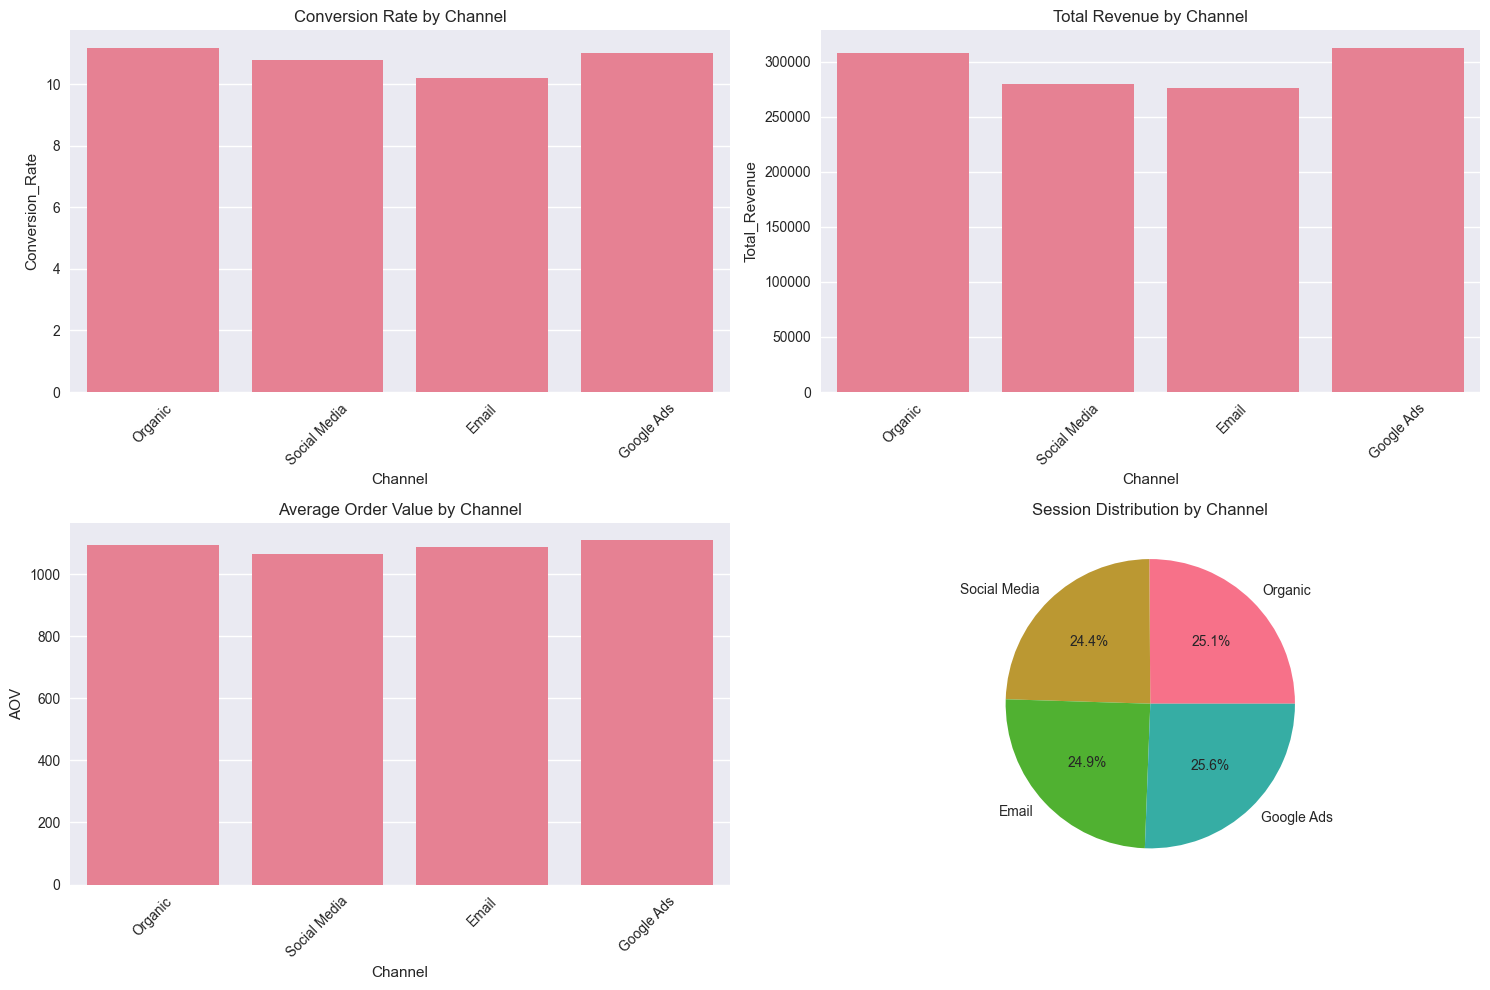

In [20]:
channel_funnel = []

for channel in df["Channel"].unique():
    channel_sessions = session_summary[session_summary["Channel"] == channel]
    total_sessions = len(channel_sessions)

    if total_sessions > 0:
        channel_metrics = {"Channel": channel, "Total_Sessions": total_sessions}

        for i, stage in enumerate(funnel_stages):
            if i == 0:
                count = total_sessions
            else:
                count = len(channel_sessions[channel_sessions["Max_Funnel_Stage"].isin(funnel_stages[i:])])

            channel_metrics[f"{stage}_Sessions"] = count
            channel_metrics[f"{stage}_Rate"] = (count / total_sessions * 100)

        # Revenue metrics
        
        purchase_sessions = channel_sessions[channel_sessions["Max_Funnel_Stage"] == "Purchase"]

        channel_metrics["Total_Revenue"] = purchase_sessions["Revenue"].sum()
        channel_metrics["AOV"] = (purchase_sessions["Revenue"].mean()
            if len(purchase_sessions) > 0 else 0
        )
        channel_metrics["Conversion_Rate"] = (len(purchase_sessions) / total_sessions * 100)

        channel_funnel.append(channel_metrics)


# Channel performance summary

channel_df = pd.DataFrame(channel_funnel)

print("📊 Channel Performance Analysis:")
display(channel_df.round(2))

# Visualize channel performance

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Conversion rates by channel

sns.barplot(data=channel_df, x="Channel", y="Conversion_Rate", ax=ax1)
ax1.set_title("Conversion Rate by Channel")
ax1.tick_params(axis="x", rotation=45)

# Total revenue by channel

sns.barplot(data=channel_df, x="Channel", y="Total_Revenue", ax=ax2)
ax2.set_title("Total Revenue by Channel")
ax2.tick_params(axis="x", rotation=45)

# AOV by channel

sns.barplot(data=channel_df, x="Channel", y="AOV", ax=ax3)
ax3.set_title("Average Order Value by Channel")
ax3.tick_params(axis="x", rotation=45)

# Session distribution by channel

channel_df["Session_Percentage"] = (channel_df["Total_Sessions"] / channel_df["Total_Sessions"].sum() * 100)

ax4.pie(channel_df["Session_Percentage"], labels=channel_df["Channel"], autopct="%1.1f%%")
ax4.set_title("Session Distribution by Channel")

plt.tight_layout()
plt.show()

# **Regional Analysis**

🌍 Regional Performance:


,Total_Sessions,Total_Revenue,Session_Duration_Min,Converted_Sessions,Conversion_Rate,AOV
Region,,,,,,
East,2514,301767.14,4.146778,280,11.14,1077.74
North,2504,288027.95,3.998003,261,10.42,1103.56
South,2506,311018.57,4.102155,282,11.25,1102.90
West,2476,275592.12,4.080775,257,10.38,1072.34


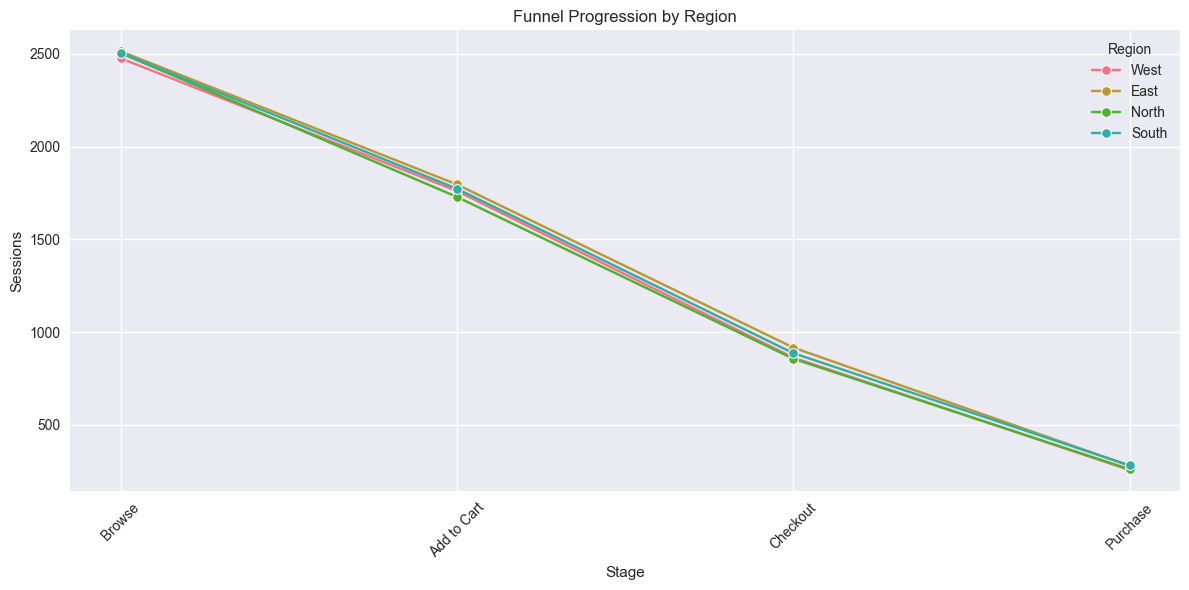

In [21]:
regional_analysis = session_summary.groupby('Region').agg({
    'Session_ID': 'count',
    'Revenue': 'sum',
    'Session_Duration_Min': 'mean'
}).rename(columns={
    'Session_ID': 'Total_Sessions',
    'Revenue': 'Total_Revenue'
})

# Add conversion rates by region
regional_conversion = (session_summary[session_summary['Max_Funnel_Stage'] == 'Purchase'].groupby('Region').size())
regional_analysis['Converted_Sessions'] = regional_conversion
regional_analysis['Conversion_Rate'] = (regional_analysis['Converted_Sessions'] / regional_analysis['Total_Sessions'] * 100).round(2)
regional_analysis['AOV'] = (regional_analysis['Total_Revenue'] / regional_analysis['Converted_Sessions']).round(2)

print("🌍 Regional Performance:")
display(regional_analysis)


regional_funnel_data = []

for region in df['Region'].unique():
    region_sessions = session_summary[session_summary['Region'] == region]

    for stage in funnel_stages:
        if stage == 'Browse':
            count = len(region_sessions)
        else:
            count = len(region_sessions[region_sessions['Max_Funnel_Stage'].isin(funnel_stages[funnel_stages.index(stage):])])

        regional_funnel_data.append({
            'Region': region,
            'Stage': stage,
            'Sessions': count
        })

regional_funnel_df = pd.DataFrame(regional_funnel_data)

plt.figure(figsize=(12, 6))
sns.lineplot(data=regional_funnel_df, x='Stage', y='Sessions', hue='Region', marker='o')
plt.title('Funnel Progression by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Device and Product Category Analysis**

📱 Device Performance:


,Total_Sessions,Revenue,Session_Duration_Min,Purchases,Conversion_Rate,AOV
Device,,,,,,
Desktop,3331,399395.43,4.095167,372,11.17,1073.64
Mobile,3345,405451.84,4.061584,363,10.85,1116.95
Tablet,3324,371558.51,4.089350,345,10.38,1076.98


🏷️ Product Category Performance:


,Total_Sessions,Revenue,Purchases,Conversion_Rate,AOV,Revenue_Per_Session
Product_Category,,,,,,
Beauty,1978,241834.97,226,11.43,1070.07,122.26
Electronics,2046,226451.63,208,10.17,1088.71,110.68
Fashion,2035,237261.50,220,10.81,1078.46,116.59
Home,1941,232534.83,211,10.87,1102.06,119.80
Sports,2000,238322.85,215,10.75,1108.48,119.16


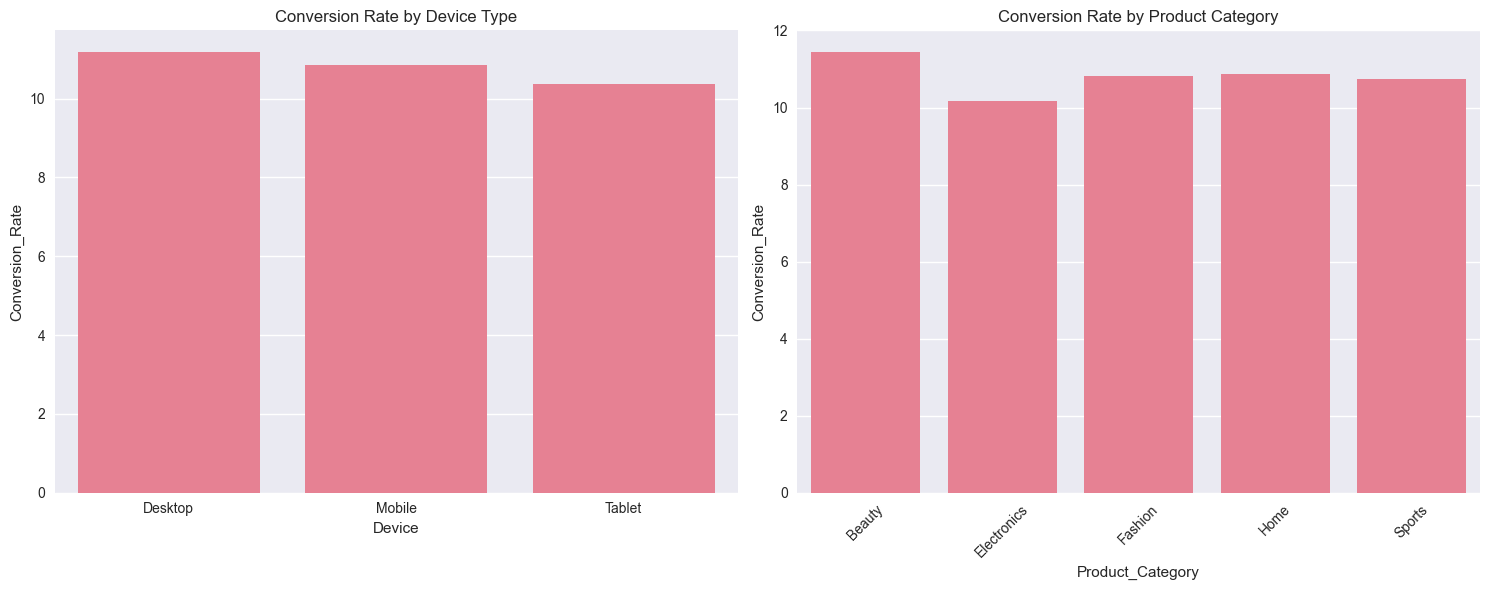

In [22]:
device_analysis = session_summary.groupby('Device').agg({
    'Session_ID': 'count',
    'Revenue': 'sum',
    'Session_Duration_Min': 'mean',
    'Max_Funnel_Stage': lambda x: (x == 'Purchase').sum()}).rename(columns={
    'Session_ID': 'Total_Sessions',
    'Max_Funnel_Stage': 'Purchases'
})

device_analysis['Conversion_Rate'] = (device_analysis['Purchases'] / device_analysis['Total_Sessions'] * 100).round(2)

device_analysis['AOV'] = (device_analysis['Revenue'] / device_analysis['Purchases']).round(2)

print("📱 Device Performance:")
display(device_analysis)

# Product category analysis

product_analysis = session_summary.groupby('Product_Category').agg({
    'Session_ID': 'count',
    'Revenue': 'sum',
    'Max_Funnel_Stage': lambda x: (x == 'Purchase').sum()}).rename(columns={
    'Session_ID': 'Total_Sessions',
    'Max_Funnel_Stage': 'Purchases'
})

product_analysis['Conversion_Rate'] = (product_analysis['Purchases'] / product_analysis['Total_Sessions'] * 100).round(2)

product_analysis['AOV'] = (product_analysis['Revenue'] / product_analysis['Purchases']).round(2)

product_analysis['Revenue_Per_Session'] = (product_analysis['Revenue'] / product_analysis['Total_Sessions']).round(2)


print("🏷️ Product Category Performance:")
display(product_analysis)

# Combined visualization

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Device performance

sns.barplot(data=device_analysis.reset_index(), x='Device', y='Conversion_Rate', ax=ax1)
ax1.set_title('Conversion Rate by Device Type')

# Product category performance

sns.barplot(data=product_analysis.reset_index(), x='Product_Category', y='Conversion_Rate', ax=ax2)
ax2.set_title('Conversion Rate by Product Category')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# **Time-Based Analysis**

📊 Daily Performance Trends:


,Daily_Sessions,Daily_Users,Revenue,Daily_Conversions,Daily_Conversion_Rate
Date,,,,,
2025-10-22,300,300,33633.64,31,10.33
2025-10-23,347,347,50983.83,47,13.54
2025-10-24,315,315,39543.10,38,12.06
2025-10-25,364,364,50965.19,42,11.54
2025-10-26,355,355,42548.29,38,10.70
2025-10-27,310,310,41315.66,42,13.55
2025-10-28,347,347,39963.77,31,8.93
2025-10-29,336,336,29960.83,28,8.33
2025-10-30,331,331,35412.95,34,10.27


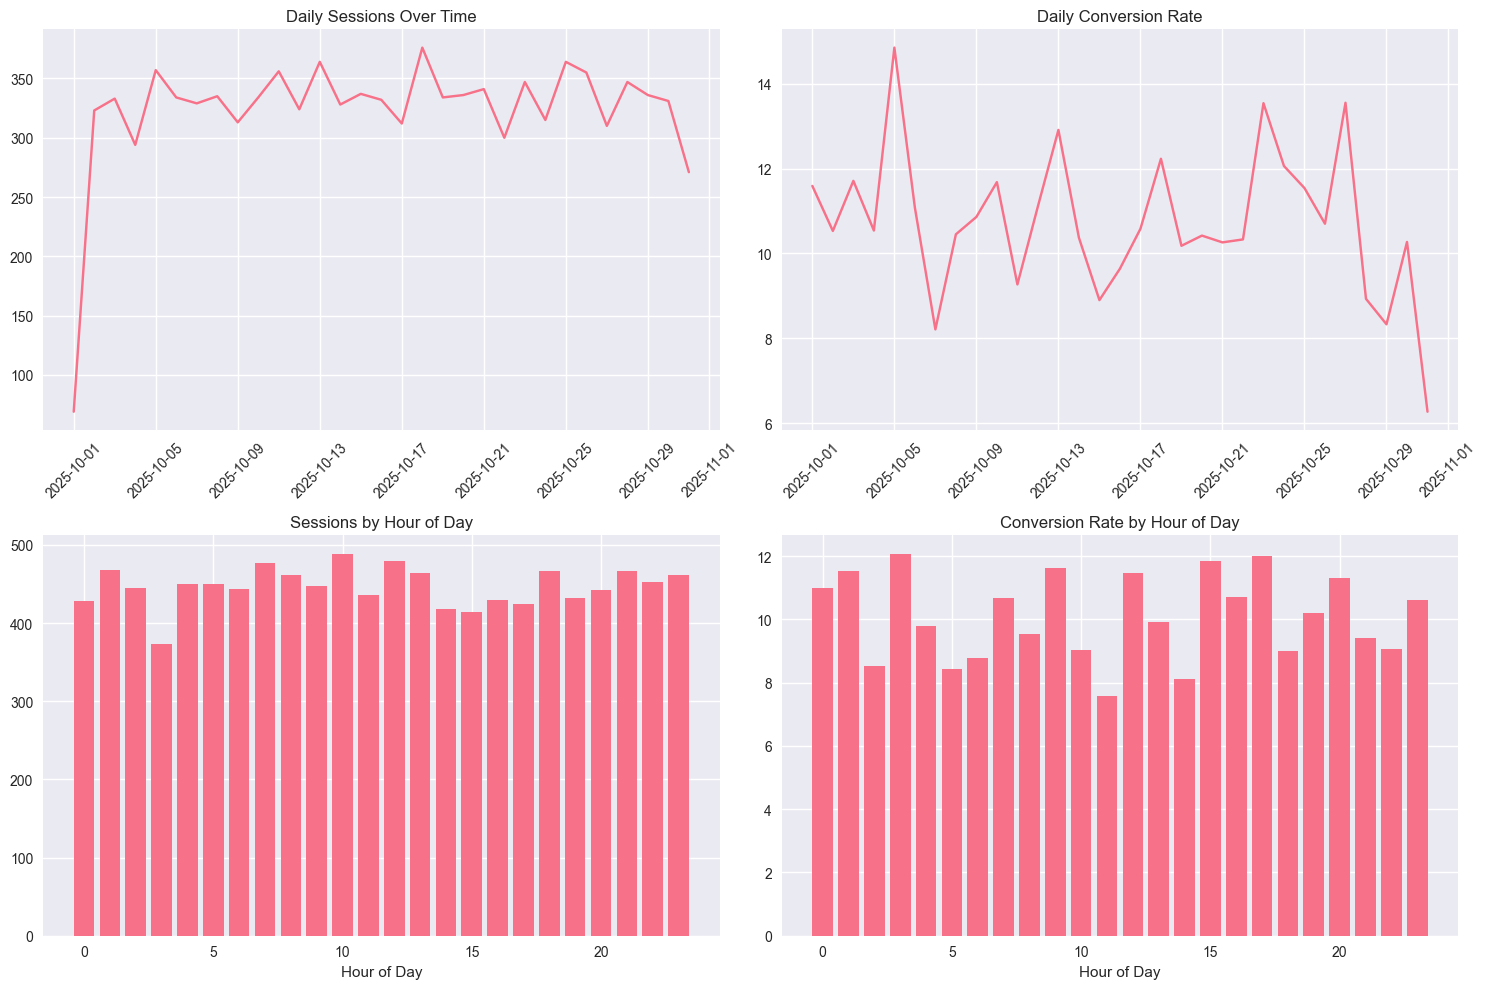

In [23]:
# Daily trends
daily_metrics = df.groupby('Date').agg({
    'Session_ID': 'nunique',
    'User_ID': 'nunique',
    'Revenue': 'sum'
}).rename(columns={'Session_ID': 'Daily_Sessions','User_ID': 'Daily_Users'})

# Add conversion rates daily
# Modify the problematic line to extract date from datetime
daily_conversions = (session_summary[session_summary['Max_Funnel_Stage'] == 'Purchase'].groupby(session_summary['Session_Start'].dt.date).size())

daily_metrics['Daily_Conversions'] = daily_conversions
daily_metrics['Daily_Conversion_Rate'] = (daily_metrics['Daily_Conversions'] / daily_metrics['Daily_Sessions'] * 100).round(2)

print("📊 Daily Performance Trends:")
display(daily_metrics.tail(10))


# Hourly patterns
hourly_sessions = df.groupby('Hour').agg({'Session_ID': 'nunique','Revenue': 'sum'
}).rename(columns={'Session_ID': 'Hourly_Sessions'})


# Hourly patterns
hourly_sessions = df.groupby('Hour').agg({'Session_ID': 'nunique','Revenue': 'sum'
}).rename(columns={'Session_ID': 'Hourly_Sessions'})

hourly_conversions = session_summary[session_summary['Max_Funnel_Stage'] == 'Purchase']
hourly_conversions['Hour'] = hourly_conversions['Session_Start'].dt.hour
hourly_conversion_counts = hourly_conversions.groupby('Hour').size()

hourly_sessions['Hourly_Conversions'] = hourly_conversion_counts
hourly_sessions['Hourly_Conversion_Rate'] = (hourly_sessions['Hourly_Conversions'] / hourly_sessions['Hourly_Sessions'] * 100).round(2)


# Visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))


# Daily sessions
ax1.plot(daily_metrics.index, daily_metrics['Daily_Sessions'])
ax1.set_title('Daily Sessions Over Time')
ax1.tick_params(axis='x', rotation=45)


# Daily conversion rate
ax2.plot(daily_metrics.index, daily_metrics['Daily_Conversion_Rate'])
ax2.set_title('Daily Conversion Rate')
ax2.tick_params(axis='x', rotation=45)


# Hourly session pattern
ax3.bar(hourly_sessions.index, hourly_sessions['Hourly_Sessions'])
ax3.set_title('Sessions by Hour of Day')
ax3.set_xlabel('Hour of Day')


# Hourly conversion rate
ax4.bar(hourly_sessions.index, hourly_sessions['Hourly_Conversion_Rate'])
ax4.set_title('Conversion Rate by Hour of Day')
ax4.set_xlabel('Hour of Day')

plt.tight_layout()
plt.show()

## **Funnel Metrics and KPIs**

In [24]:
# Calculate advanced metrics
print("🔑 KEY PERFORMANCE INDICATORS (KPIs)")
print("=" * 50)


# Overall KPIs
total_sessions = len(session_summary)
total_revenue = session_summary['Revenue'].sum()
total_orders = len(session_summary[session_summary['Max_Funnel_Stage'] == 'Purchase'])
overall_conversion_rate = (total_orders / total_sessions * 100)

print(f"📈 Overall Conversion Rate: {overall_conversion_rate:.2f}%")
print(f"💰 Total Revenue: ${total_revenue:.2f}")
print(f"🛒 Average Order Value: ${(total_revenue / total_orders):.2f}")
print(f"👥 Total Sessions: {total_sessions:,}")
print(f"✅ Total Orders: {total_orders:,}")


# Funnel efficiency metrics
browse_to_cart = (funnel_df.iloc[1]['Sessions'] / funnel_df.iloc[0]['Sessions'] * 100)
cart_to_checkout = (funnel_df.iloc[2]['Sessions'] / funnel_df.iloc[1]['Sessions'] * 100)
checkout_to_purchase = (funnel_df.iloc[3]['Sessions'] / funnel_df.iloc[2]['Sessions'] * 100)


print(f"\n🔄 Stage-to-Stage Conversion Rates:")
print(f"  Browse → Add to Cart: {browse_to_cart:.2f}%")
print(f"  Add to Cart → Checkout: {cart_to_checkout:.2f}%")
print(f"  Checkout → Purchase: {checkout_to_purchase:.2f}%")


# Revenue per session at each stage
revenue_per_browse = total_revenue / funnel_df.iloc[0]['Sessions']
revenue_per_cart = total_revenue / funnel_df.iloc[1]['Sessions']
revenue_per_checkout = total_revenue / funnel_df.iloc[2]['Sessions']

print(f"\n💰 Revenue per Session by Stage:")
print(f"  Per Browse Session: ${revenue_per_browse:.2f}")
print(f"  Per Cart Session: ${revenue_per_cart:.2f}")
print(f"  Per Checkout Session: ${revenue_per_checkout:.2f}")


# Bounce rate analysis
bounce_sessions = session_summary[session_summary['Bounce_Flag'] == 'Yes']
bounce_rate = (len(bounce_sessions) / total_sessions * 100)
print(f"\n🚪 Bounce Rate: {bounce_rate:.2f}%")


# Session duration analysis
avg_session_duration = session_summary['Session_Duration_Min'].mean()
print(f"\n⏱ Average Session Duration: {avg_session_duration:.2f} minutes")


🔑 KEY PERFORMANCE INDICATORS (KPIs)
📈 Overall Conversion Rate: 10.80%
💰 Total Revenue: $1176405.78
🛒 Average Order Value: $1089.26
👥 Total Sessions: 10,000
✅ Total Orders: 1,080

🔄 Stage-to-Stage Conversion Rates:
  Browse → Add to Cart: 70.59%
  Add to Cart → Checkout: 49.92%
  Checkout → Purchase: 30.65%

💰 Revenue per Session by Stage:
  Per Browse Session: $117.64
  Per Cart Session: $166.65
  Per Checkout Session: $333.83

🚪 Bounce Rate: 89.20%

⏱ Average Session Duration: 4.08 minutes
